In [1]:
# Import the modules
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select which features/columns to include in ML Model feature set
# Select which "derived" features to include in ML Model feature set

# Select crypto assets interested in evaluating
INCLUDE_BTEC = True
INCLUDE_ETH = True
INCLUDE_ADA = True

# Select the orderbook timeframe's interested in
INCLUDE_5MIN_DATA = True
INCLUDE_1MIN_DATA = True
INCLUDE_1SEC_DATA = False

NUM_ORDER_BOOK_LEVELS = 15

In [3]:
TURN_ON_PRINT_DEBUG = True

In [4]:
# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_columns', 200)

### Import the DERIVED Crytpo Order Book Data

In [5]:
# dictionary to store crypto dataframes {BTEC, ETH, ADA}, {5min, 1min, 1sec}
crypto_ob_df_dict = {} 

# Based on the selection critero, read the csv crypto order book csv files into the dictrionary
if (INCLUDE_5MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_5min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1min"] = pd.read_csv(
            Path("./derived_data_visualization/crypto_ETH_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1SEC_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )    

In [6]:
# Debug data checkpoint

if (TURN_ON_PRINT_DEBUG):
    display(crypto_ob_df_dict.keys())
    
    for crypto_ob_key in crypto_ob_df_dict: 
        print(f"\nDebug {crypto_ob_key} derived dataframe:")
        display(crypto_ob_df_dict[crypto_ob_key].shape)
        display(crypto_ob_df_dict[crypto_ob_key].head(n=5))

dict_keys(['crypto_BTC_5min', 'crypto_ETH_5min', 'crypto_ADA_5min', 'crypto_BTC_1min', 'crypto_ETH_1min', 'crypto_ADA_1min'])


Debug crypto_BTC_5min derived dataframe:


(3367, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_ETH_5min derived dataframe:


(3365, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_ADA_5min derived dataframe:


(3367, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_BTC_1min derived dataframe:


(17113, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_ETH_1min derived dataframe:


(17110, 604)

,midpoint,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,bids_market_quantity_0,bids_market_cum_quantity_0,bids_market_notional_0,bids_market_cum_notional_0,bids_cancel_quantity_0,bids_cancel_cum_quantity_0,bids_cancel_notional_0,bids_cancel_cum_notional_0,bids_quantity_0,bids_cum_quantity_0,bids_notional_0,bids_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,asks_market_quantity_0,asks_market_cum_quantity_0,asks_market_notional_0,bids_asks_imbalance_market_notional_0,asks_market_cum_notional_0,asks_cancel_quantity_0,asks_cancel_cum_quantity_0,asks_cancel_notional_0,bids_asks_imbalance_cancel_notional_0,asks_cancel_cum_notional_0,asks_quantity_0,asks_cum_quantity_0,asks_notional_0,bids_asks_imbalance_notional_0,asks_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,bids_market_quantity_1,bids_market_cum_quantity_1,bids_market_notional_1,bids_market_cum_notional_1,bids_cancel_quantity_1,bids_cancel_cum_quantity_1,bids_cancel_notional_1,bids_cancel_cum_notional_1,bids_quantity_1,bids_cum_quantity_1,bids_notional_1,bids_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,asks_market_quantity_1,asks_market_cum_quantity_1,asks_market_notional_1,bids_asks_imbalance_market_notional_1,asks_market_cum_notional_1,asks_cancel_quantity_1,asks_cancel_cum_quantity_1,asks_cancel_notional_1,bids_asks_imbalance_cancel_notional_1,asks_cancel_cum_notional_1,asks_quantity_1,asks_cum_quantity_1,asks_notional_1,bids_asks_imbalance_notional_1,asks_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,bids_market_quantity_2,bids_market_cum_quantity_2,bids_market_notional_2,bids_market_cum_notional_2,bids_cancel_quantity_2,bids_cancel_cum_quantity_2,bids_cancel_notional_2,bids_cancel_cum_notional_2,bids_quantity_2,bids_cum_quantity_2,...,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,asks_market_quantity_12,asks_market_cum_quantity_12,asks_market_notional_12,bids_asks_imbalance_market_notional_12,asks_market_cum_notional_12,asks_cancel_quantity_12,asks_cancel_cum_quantity_12,asks_cancel_notional_12,bids_asks_imbalance_cancel_notional_12,asks_cancel_cum_notional_12,asks_quantity_12,asks_cum_quantity_12,asks_notional_12,bids_asks_imbalance_notional_12,asks_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,bids_market_quantity_13,bids_market_cum_quantity_13,bids_market_notional_13,bids_market_cum_notional_13,bids_cancel_quantity_13,bids_cancel_cum_quantity_13,bids_cancel_notional_13,bids_cancel_cum_notional_13,bids_quantity_13,bids_cum_quantity_13,bids_notional_13,bids_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_cum_quantity_13,asks_limit_notional_13,bids_asks_imbalance_limit_notional_13,asks_limit_cum_notional_13,asks_market_quantity_13,asks_market_cum_quantity_13,asks_market_notional_13,bids_asks_imbalance_market_notional_13,asks_market_cum_notional_13,asks_cancel_quantity_13,asks_cancel_cum_quantity_13,asks_cancel_notional_13,bids_asks_imbalance_cancel_notional_13,asks_cancel_cum_notional_13,asks_quantity_13,asks_cum_quantity_13,asks_notional_13,bids_asks_imbalance_notional_13,asks_cum_notional_13,bids_distance_14,bids_price_14,bids_limit_quantity_14,bids_limit_cum_quantity_14,bids_limit_notional_14,bids_limit_cum_notional_14,bids_market_quantity_14,bids_market_cum_quantity_14,bids_market_notional_14,bids_market_cu


Debug crypto_ADA_1min derived dataframe:


(17109, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity

### Create the labels set (`y`)  from the “midpoint price” column, and then create the features (`X`) DataFrame from the remaining columns.

In [7]:
# Select which crypto order book data file to analyze
crypto_sel_df = crypto_ob_df_dict["crypto_BTC_5min"]

In [8]:
# Find the location of the "midpoint" column, and initialize the "Signal" to 0 (to be placed next the midpotint column entry)
midpoint_column_index = crypto_ob_df_dict[crypto_ob_key].columns.get_loc("midpoint")
if 'Signal' in crypto_sel_df.columns:
    crypto_sel_df["Signal"] = 0.0
else:
    crypto_sel_df.insert(midpoint_column_index+1, "Signal", 0.0)        

# If the midpoint price increases, set Signal to +1, else if it decreases, set to 0
crypto_sel_df.loc[(crypto_sel_df['midpoint'].shift(-1) >= crypto_sel_df['midpoint']), 'Signal'] = 1
crypto_sel_df.loc[(crypto_sel_df['midpoint'].shift(-1) < crypto_sel_df['midpoint']), 'Signal'] = 0

# drop the last row (don't know if the next row midpoint went up or down)
crypto_sel_df.drop(index=crypto_sel_df.index[-1],axis=0,inplace=True)

# Review the DataFrame
display(crypto_sel_df.shape)
display(crypto_sel_df.head(n=10))
display(crypto_sel_df.tail(n=10))

(3366, 201)

,midpoint,Signal,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,...,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_

,midpoint,Signal,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,...,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_

In [9]:
# Separate the data into labels and features

# Separate the y variable, the labels
y_srs = crypto_sel_df['Signal']

# Separate the X variable, the features
X_df = crypto_sel_df.drop(columns='Signal')

In [10]:
# Review the y variable Series
print("Target set to be used for ML models")
display(type(y_srs))
display(y_srs)

Target set to be used for ML models


pandas.core.series.Series

system_time
2021-04-07 11:37:41.122161+00:00    1.0
2021-04-07 11:42:41.122161+00:00    0.0
2021-04-07 11:47:41.122161+00:00    1.0
2021-04-07 11:52:41.122161+00:00    1.0
2021-04-07 11:57:41.122161+00:00    0.0
                                   ... 
2021-04-19 09:25:00.386544+00:00    1.0
2021-04-19 09:30:00.386544+00:00    1.0
2021-04-19 09:35:00.386544+00:00    1.0
2021-04-19 09:40:00.386544+00:00    0.0
2021-04-19 09:45:00.386544+00:00    0.0
Name: Signal, Length: 3366, dtype: float64

In [11]:
# Review the X variable DataFrame
print("Feature set DataFrame be used for ML models")
display(X_df.shape)
display(X_df)

Feature set DataFrame be used for ML models


(3366, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity

### Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [12]:
# Check the balance of our target values
print("# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased)")
display(y_srs.value_counts())

# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased)


1.0    1698
0.0    1668
Name: Signal, dtype: int64

### Split the data into training and testing datasets

In [13]:
# Split the data using 75% test, 25% train

train_index = int(X_df.shape[0] * 0.75) - 1

X_train_df = X_df.iloc[:train_index]
y_train_srs = y_srs.iloc[:train_index]

X_test_df = X_df.iloc[train_index:]
y_test_srs = y_srs.iloc[train_index:]

## Split the data using train_test_split
## Assign a random_state of 1 to the function
#X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)

In [14]:
# Data checkpoint
print("# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased) in the Training Set")
display(y_train_srs.value_counts())
print("# of loan_status values that = 1 (midpoint price increased) and = 0 (loan decreased) in the Target/Test Set")
display(y_test_srs.value_counts())

# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased) in the Training Set


1.0    1292
0.0    1231
Name: Signal, dtype: int64

# of loan_status values that = 1 (midpoint price increased) and = 0 (loan decreased) in the Target/Test Set


0.0    437
1.0    406
Name: Signal, dtype: int64

###  Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [15]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg_model = LogisticRegression(random_state=1)

# Fit the model using training data
logreg_model.fit(X_train_df, y_train_srs)

LogisticRegression(random_state=1)

In [16]:
#### svm_model = SVC(kernel='linear')
#### 
#### # Fit the data
#### svm_model.fit(X_train_df, y_train_srs)

In [17]:
# Creating the decision tree classifier instance
dectree_model = tree.DecisionTreeClassifier(random_state=1)

# Fitting the model
dectree_model = dectree_model.fit(X_train_df, y_train_srs)

In [18]:
# Create a random forest classifier
rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rndfor_model = rndfor_model.fit(X_train_df, y_train_srs)

In [19]:
# Instantiate the model with k = 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train_df, y_train_srs)

KNeighborsClassifier(n_neighbors=3)

### Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [20]:
# Make a prediction using the testing data on the logistics Regression model
logreg_y_pred_npa = logreg_model.predict(X_test_df)

#### # Make a prediction using the testing data on the Support Vector Matrix model
#### svm_y_pred_npa = svm_model.predict(X_test_df)

# Make a prediction using the testing data on the Decision Tree model
dectree_y_pred_npa = dectree_model.predict(X_test_df)

# Make a prediction using the testing data on the Random Forest model
rndfor_y_pred_npa = rndfor_model.predict(X_test_df)

# Make a prediction using the testing data on the KNN model
knn_y_pred_npa = knn_model.predict(X_test_df)

### Evaluate the model’s performance by doing the following:

In [21]:
print("Balanced Accuracy Scores:")
print("-------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))


Balanced Accuracy Scores:
-------------------------
Logistic Regression:                   0.5092124990136511
Decision Tree:                         0.47399420590456653
Random Forest:                         0.506678991331402
KNN:                                   0.5211585936355131


In [22]:
# Print confusion matrix
def confusion_matrix_sklearn(y_test, y_pred, plt_title):
    """
    To plot the confusion_matrix with percentages
    prediction:  predicted values
    original:    original values
    """
    cm = confusion_matrix(y_test, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(plt_title)

In [23]:
display(y_test_srs.shape)
display(logreg_y_pred_npa.shape)

(843,)

(843,)

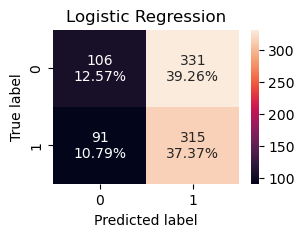

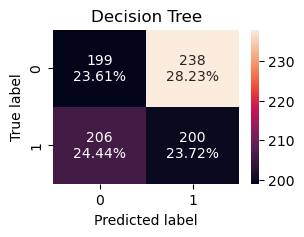

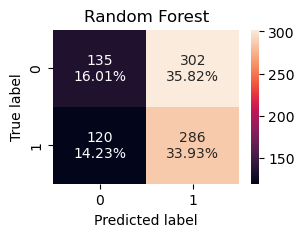

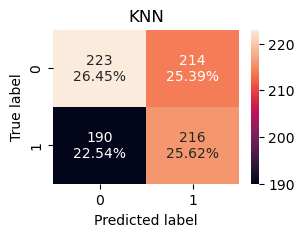

In [24]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN")

In [25]:
# Print the classification report for the Logistics Regression model
logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)

#### # Print the classification report for the SVM model
#### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)

# Print the classification report for the Decision Tree model
dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)

# Print the classification report for the Random Forest model
rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)

# Print the classification report for the KNN model
knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)

In [26]:
print("Logistic Regression Classification Report:\n", logreg_class_rpt)
####print("SVM Classification Report:\n", svm_class_rpt)
print("Decision Tree Classification Report:\n", dectree_class_rpt)
print("Random Forest Classification Report:\n", rndfor_class_rpt)
print("KNN Classification Report:\n", knn_class_rpt)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.24      0.33       437
         1.0       0.49      0.78      0.60       406

    accuracy                           0.50       843
   macro avg       0.51      0.51      0.47       843
weighted avg       0.51      0.50      0.46       843

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.46      0.47       437
         1.0       0.46      0.49      0.47       406

    accuracy                           0.47       843
   macro avg       0.47      0.47      0.47       843
weighted avg       0.47      0.47      0.47       843

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.31      0.39       437
         1.0       0.49      0.70      0.58       406

    accuracy                           0.50       843
   macro

## Scale the data

In [27]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train_df)
X_train_scaled_npa = X_scaler.transform(X_train_df)
X_test_scaled_npa = X_scaler.transform(X_test_df)

###  Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [28]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg_model = LogisticRegression(random_state=1)

# Fit the model using training data
logreg_model.fit(X_train_scaled_npa, y_train_srs)

LogisticRegression(random_state=1)

###  Fit a Support Vector Machine model by using the training data (`X_train` and `y_train`).

In [29]:
#### svm_model = SVC(kernel='linear')
#### 
#### # Fit the data
#### svm_model.fit(X_train_scaled_npa, y_train_srs)

###  Fit a Decision Tree model by using the training data (`X_train` and `y_train`).

In [30]:
# Creating the decision tree classifier instance
dectree_model = tree.DecisionTreeClassifier(random_state=1)

# Fitting the model
dectree_model = dectree_model.fit(X_train_scaled_npa, y_train_srs)

###  Fit a Random Forest model by using the training data (`X_train` and `y_train`).

In [31]:
# Create a random forest classifier
rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rndfor_model = rndfor_model.fit(X_train_scaled_npa, y_train_srs)

###  Fit a KNN model by using the training data (`X_train` and `y_train`).

In [32]:
# Instantiate the model with k = 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train_scaled_npa, y_train_srs)

KNeighborsClassifier(n_neighbors=3)

### Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [33]:
# Make a prediction using the testing data on the logistics Regression model
logreg_y_pred_npa = logreg_model.predict(X_test_scaled_npa)

#### # Make a prediction using the testing data on the Support Vector Matrix model
#### svm_y_pred_npa = svm_model.predict(X_test_scaled_npa)

# Make a prediction using the testing data on the Decision Tree model
dectree_y_pred_npa = dectree_model.predict(X_test_scaled_npa)

# Make a prediction using the testing data on the Random Forest model
rndfor_y_pred_npa = rndfor_model.predict(X_test_scaled_npa)

# Make a prediction using the testing data on the KNN model
knn_y_pred_npa = knn_model.predict(X_test_scaled_npa)

### Evaluate the model’s performance by doing the following:

In [34]:
print("Balanced Accuracy Scores (w/ Scaling):")
print("--------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))


Balanced Accuracy Scores (w/ Scaling):
--------------------------------------
Logistic Regression:                   0.51733437792382
Decision Tree:                         0.4754793655803677
Random Forest:                         0.5087052338492408
KNN:                                   0.4852357655758587


In [35]:
# Print confusion matrix
def confusion_matrix_sklearn(y_test, y_pred, plt_title):
    """
    To plot the confusion_matrix with percentages
    prediction:  predicted values
    original:    original values
    """
    cm = confusion_matrix(y_test, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(plt_title)

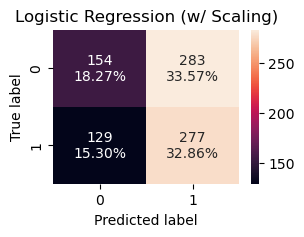

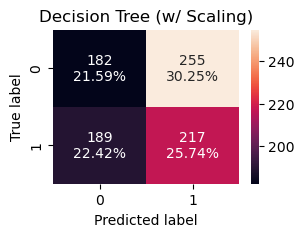

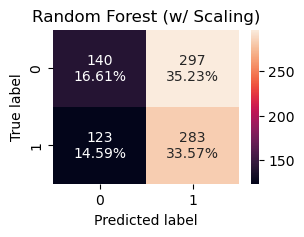

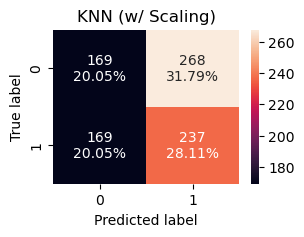

In [36]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression (w/ Scaling)")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN (w/ Scaling)")

In [37]:
# Print the classification report for the Logistics Regression model
logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)

#### # Print the classification report for the SVM model
#### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)

# Print the classification report for the Decision Tree model
dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)

# Print the classification report for the Random Forest model
rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)

# Print the classification report for the KNN model
knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)

In [38]:
print("Logistic Regression Classification Report (w/ Scaling):\n", logreg_class_rpt)
####print("SVM Classification Report (w/ Scaling):\n", svm_class_rpt)
print("Decision Tree Classification Report (w/ Scaling):\n", dectree_class_rpt)
print("Random Forest Classification Report (w/ Scaling):\n", rndfor_class_rpt)
print("KNN Classification Report (w/ Scaling):\n", knn_class_rpt)

Logistic Regression Classification Report (w/ Scaling):
               precision    recall  f1-score   support

         0.0       0.54      0.35      0.43       437
         1.0       0.49      0.68      0.57       406

    accuracy                           0.51       843
   macro avg       0.52      0.52      0.50       843
weighted avg       0.52      0.51      0.50       843

Decision Tree Classification Report (w/ Scaling):
               precision    recall  f1-score   support

         0.0       0.49      0.42      0.45       437
         1.0       0.46      0.53      0.49       406

    accuracy                           0.47       843
   macro avg       0.48      0.48      0.47       843
weighted avg       0.48      0.47      0.47       843

Random Forest Classification Report (w/ Scaling):
               precision    recall  f1-score   support

         0.0       0.53      0.32      0.40       437
         1.0       0.49      0.70      0.57       406

    accuracy           

,midpoint,bids_price_0,asks_price_0,Actual_Returns,Signal,LogReg_Signal,DecTree_Signal,RndFor_Signal,KNN_Signal
1,60949.955,60949.95,60949.96,0.001184,0.0,0.0,0.0,1.0,1.0
2,60808.225,60808.22,60808.23,-0.002325,0.0,1.0,0.0,0.0,1.0
3,60751.635,60751.63,60751.64,-0.000931,1.0,1.0,1.0,1.0,0.0
4,60884.485,60884.48,60884.49,0.002187,0.0,0.0,1.0,1.0,0.0
5,60667.095,60667.09,60667.10,-0.003571,0.0,1.0,0.0,1.0,1.0


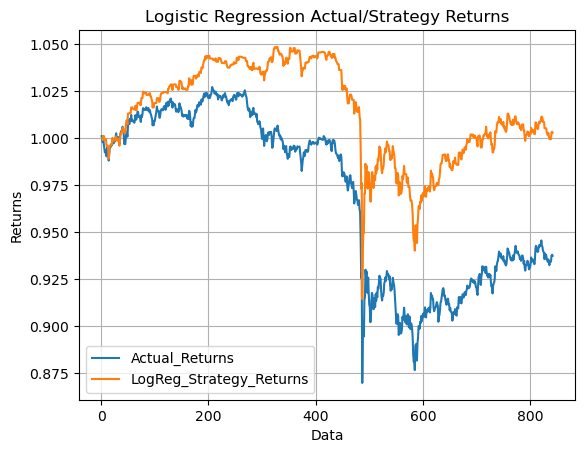

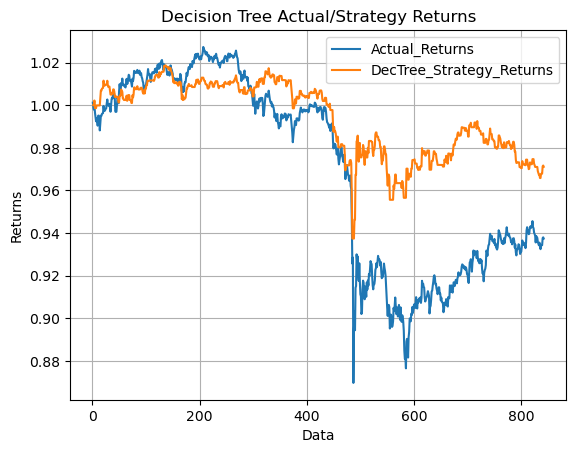

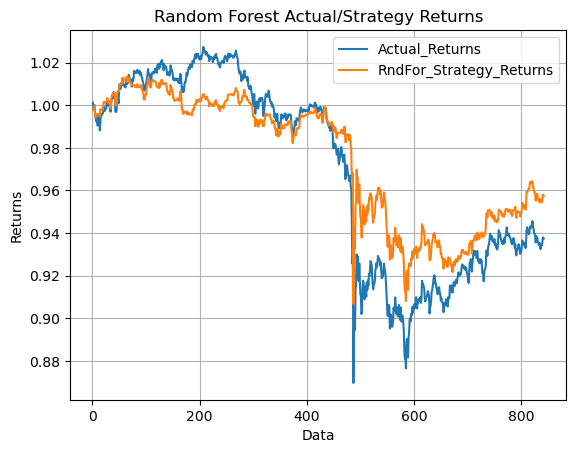

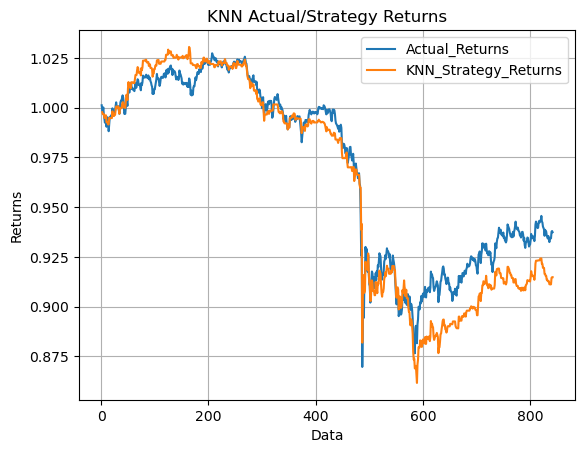

In [39]:
# Plot the cumulative returns from trasing strategies using machine learning

predictions_df = X_test_df[["midpoint", "bids_price_0", "asks_price_0"]]
predictions_df["Actual_Returns"] = (predictions_df["midpoint"] - predictions_df["midpoint"].shift(1)) / predictions_df["midpoint"].shift(1)

predictions_df["Signal"] = y_test_srs

predictions_df["LogReg_Signal"] = logreg_y_pred_npa
predictions_df["DecTree_Signal"] = dectree_y_pred_npa
predictions_df["RndFor_Signal"] = rndfor_y_pred_npa
predictions_df["KNN_Signal"] = knn_y_pred_npa

predictions_df.reset_index(drop=True, inplace=True)

# Since shifted the signals down by 1 day, the first entry will be Nan, dropit
predictions_df.dropna(inplace=True)

display(predictions_df.head())

# Add the strategy returns to the DataFrame
# Shifting signal column ... 
#    deciding what the signal will be on day N
#    Buying/Selling stock the "next" day (day N+1)
#    Therefore, strategy returns are computed for next day (N+1)
predictions_df['LogReg_Strategy_Returns'] = predictions_df['Actual_Returns'] * predictions_df['LogReg_Signal'].shift(1)
(1 + predictions_df[['Actual_Returns', 'LogReg_Strategy_Returns']]).cumprod().plot(title="Logistic Regression Actual/Strategy Returns", xlabel="Data", ylabel="Returns").grid()

predictions_df['DecTree_Strategy_Returns'] = predictions_df['Actual_Returns'] * predictions_df['DecTree_Signal'].shift(1)
(1 + predictions_df[['Actual_Returns', 'DecTree_Strategy_Returns']]).cumprod().plot(title="Decision Tree Actual/Strategy Returns", xlabel="Data", ylabel="Returns").grid()

predictions_df['RndFor_Strategy_Returns'] = predictions_df['Actual_Returns'] * predictions_df['RndFor_Signal'].shift(1)
(1 + predictions_df[['Actual_Returns', 'RndFor_Strategy_Returns']]).cumprod().plot(title="Random Forest Actual/Strategy Returns", xlabel="Data", ylabel="Returns").grid()

predictions_df['KNN_Strategy_Returns'] = predictions_df['Actual_Returns'] * predictions_df['KNN_Signal'].shift(1)
(1 + predictions_df[['Actual_Returns', 'KNN_Strategy_Returns']]).cumprod().plot(title="KNN Actual/Strategy Returns", xlabel="Data", ylabel="Returns").grid()